<a href="https://colab.research.google.com/github/antolinec/Colab/blob/main/Colab_LabAct5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1: Independent Samples; n>30
An entomologist is entranced with ants and has a large array of ant colonies in their modified garage. The entomologist is experimenting with a new breeding technique and used it on carpenter ants and fire ants. Their aim was to make both ant species the be around the same size after a few generations. After 7 generations of breeding, the scientist hired assistants to gather data. The data was summarized whereas the average and standard deviation of the fire ants’ length was 3.456mm and 1.01mm respectively while it was 2.468mm and 1.392mm for carpenter ants. If the entomologist measured 250 ants of each species, is there enough evidence to prove that this batch of carpenter ants and fire ants are of the same size with a 99% level of confidence?


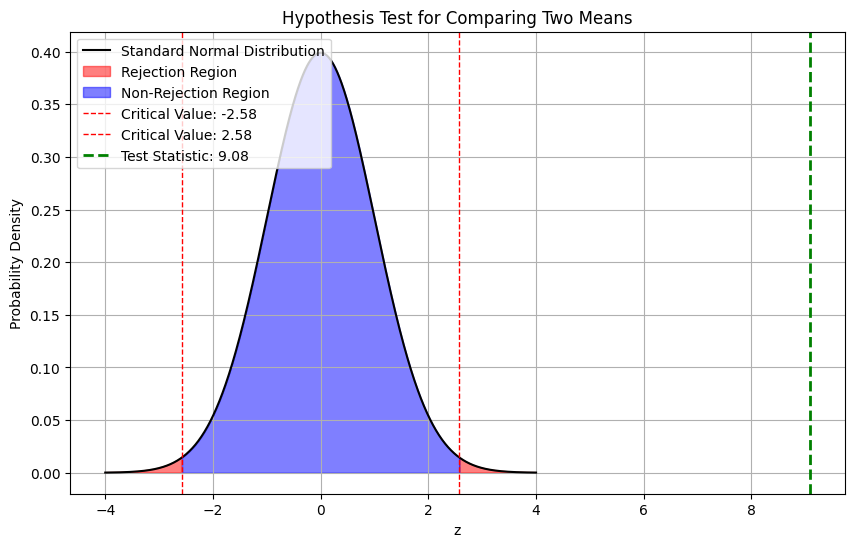

Test Statistic: 9.08
P-value: 0.0000
Critical Values: [np.float64(-2.5758293035489004), np.float64(2.5758293035489004)]
Reject the null hypothesis: There is a significant difference between the means.


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given data for the two groups
mean_fAnts = 3.456
std_fAnts = 1.01
n_fAnts = 250

mean_cAnts = 2.468
std_cAnts = 1.392
n_cAnts = 250

# Calculate the standard error for the difference in means
SE = np.sqrt((std_fAnts**2 / n_fAnts) + (std_cAnts**2 / n_cAnts))

# Calculate the z-statistic
z_stat = (mean_fAnts - mean_cAnts) / SE

# Define the significance level and critical value
alpha = 0.01
z_critical = stats.norm.ppf(1 - alpha/2)
z_critical_values = [-z_critical, z_critical]

# Generate x values for the normal distribution
x = np.linspace(-4,4,1000)
y = stats.norm.pdf(x)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution', color='black')

# Shade the rejection region in red
plt.fill_between(x, y, where=(x <= z_critical_values[0]) | (x >= z_critical_values[1]), color='red', alpha=0.5, label='Rejection Region')

# Shade the non-rejection region in blue
plt.fill_between(x, y, where=(x > z_critical_values[0]) & (x < z_critical_values[1]), color='blue', alpha=0.5, label='Non-Rejection Region')

# Draw lines for the critical z-values
for z_val in z_critical_values:
    plt.axvline(z_val, color='red', linestyle='--', linewidth=1, label=f'Critical Value: {z_val:.2f}')

# Draw line for the test statistic
plt.axvline(z_stat, color='green', linestyle='--', linewidth=2, label=f'Test Statistic: {z_stat:.2f}')

# Add labels and title
plt.title('Hypothesis Test for Comparing Two Means')
plt.xlabel('z')
plt.ylabel('Probability Density')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.show()

# Print the test statistic and p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # two-tailed p-value
print(f"Test Statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Critical Values: {z_critical_values}")

# Print conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

Problem 2:
Independent Samples; n<=30; Equal s2
The child of the ant eccentric wants to emulate their parent. One day, for their grade school science experiment, they got curious about whether their fire ants are larger than their carpenter ants. To study this, the student went to their colonies and measured their lengths at the cost of an allergic reaction due to the retaliation of kidnapped ants. The student tearfully summarized the data and found out that the mean length of the carpenter ants and fire ants are 2.6mm and 3.1mm respectively. The student was already experiencing physical pain and did not bother with being precise and simply accepted the number they solved for the standard deviation to be 1.2mm for both species. The child was able to measure 30 carpenter ants and 13 fire ants. Is there sufficient evidence to prove that fire ants are larger than carpenter ants if the confidence level used was 90%?


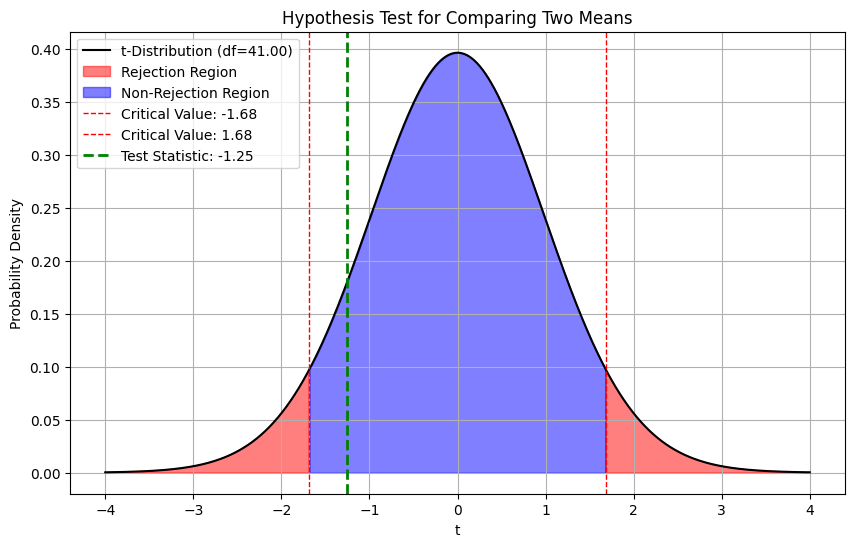

Test Statistic: -1.25
P-value: 0.2166
Critical Values: [np.float64(-1.6828780021327079), np.float64(1.6828780021327079)]
Fail to reject the null hypothesis: There is no significant difference between the means.


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given data for the two groups
mean_cAnt = 2.6
std_cAnt = 1.2
n_cAnt = 30

mean_fAnt = 3.1
std_fAnt = 1.2
n_fAnt = 13

# Calculate the standard error for the difference in means
SE = np.sqrt((std_cAnt**2 / n_cAnt) + (std_fAnt**2 / n_fAnt))

# Calculate the t-statistic
t_stat = (mean_cAnt - mean_fAnt) / SE

# Calculate the degrees of freedom using the formula for equal variances
df = ((n_cAnt + n_fAnt)-2)

# Define the significance level and critical value
alpha = 0.10
t_critical = stats.t.ppf(1 - alpha/2, df)
t_critical_values = [-t_critical, t_critical]

# Generate x values for the t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-Distribution (df={df:.2f})', color='black')

# Shade the rejection region in red
plt.fill_between(x, y, where=(x <= t_critical_values[0]) | (x >= t_critical_values[1]), color='red', alpha=0.5, label='Rejection Region')

# Shade the non-rejection region in blue
plt.fill_between(x, y, where=(x > t_critical_values[0]) & (x < t_critical_values[1]), color='blue', alpha=0.5, label='Non-Rejection Region')

# Draw lines for the critical t-values
for t_val in t_critical_values:
    plt.axvline(t_val, color='red', linestyle='--', linewidth=1, label=f'Critical Value: {t_val:.2f}')

# Draw line for the test statistic
plt.axvline(t_stat, color='green', linestyle='--', linewidth=2, label=f'Test Statistic: {t_stat:.2f}')

# Add labels and title
plt.title('Hypothesis Test for Comparing Two Means')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.show()

# Print the test statistic and p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))  # two-tailed p-value
print(f"Test Statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Critical Values: {t_critical_values}")

# Print conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

Problem 3:
Independent Samples; n<=30; Unequal s2
The snotty grade school student bitten by ants for their research was traumatized but was eventually able to proceed to secondary education. For their high school research, the child of the ant enthusiast decided to get over their trauma and study more about the ants that bit them. As part of their thesis, they need to compare the sizes of different species of ants. The student learned from their trauma and wore protective gear, a hazmat suit stolen from their parent’s stash. The student tried out whether their new technique will work and decided to practice on fire ants and carpenter ants.With a level of significance at 5%, is there enough evidence to prove that fire ants are larger than carpenter ants?


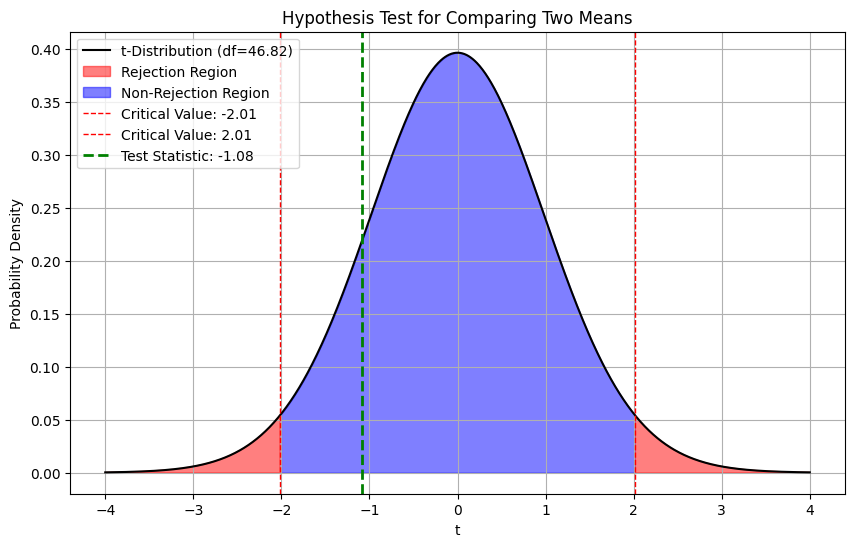

Test Statistic: -1.08
P-value: 0.2841
Critical Values: [np.float64(-2.0119498537748672), np.float64(2.0119498537748672)]
Fail to reject the null hypothesis: There is no significant difference between the means.


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given data for the two groups
mean_cAnt = 2.65
std_cAnt = 0.92
n_cAnt = 30

mean_fAnt = 3.01
std_fAnt = 1.57
n_fAnt = 30

# Calculate the standard error for the difference in means
SE = np.sqrt((std_cAnt**2 / n_cAnt) + (std_fAnt**2 / n_fAnt))

# Calculate the t-statistic
t_stat = (mean_cAnt - mean_fAnt) / SE

# Calculate the degrees of freedom using the formula for unequal variances
df = ((std_cAnt**2 / n_cAnt + std_fAnt**2 / n_fAnt)**2) / (((std_cAnt**2 / n_cAnt)**2 / (n_cAnt - 1)) + ((std_fAnt**2 / n_fAnt)**2 / (n_fAnt - 1)))

# Define the significance level and critical value
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df)
t_critical_values = [-t_critical, t_critical]

# Generate x values for the t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-Distribution (df={df:.2f})', color='black')

# Shade the rejection region in red
plt.fill_between(x, y, where=(x <= t_critical_values[0]) | (x >= t_critical_values[1]), color='red', alpha=0.5, label='Rejection Region')

# Shade the non-rejection region in blue
plt.fill_between(x, y, where=(x > t_critical_values[0]) & (x < t_critical_values[1]), color='blue', alpha=0.5, label='Non-Rejection Region')

# Draw lines for the critical t-values
for t_val in t_critical_values:
    plt.axvline(t_val, color='red', linestyle='--', linewidth=1, label=f'Critical Value: {t_val:.2f}')

# Draw line for the test statistic
plt.axvline(t_stat, color='green', linestyle='--', linewidth=2, label=f'Test Statistic: {t_stat:.2f}')

# Add labels and title
plt.title('Hypothesis Test for Comparing Two Means')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.show()

# Print the test statistic and p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))  # two-tailed p-value
print(f"Test Statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Critical Values: {t_critical_values}")

# Print conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

Problem 4:
The overcautious high schooler is now a college student preparing to enter the real world. For the final year of their Bachelor’s degree in Biology major in Entomology, only their thesis study remains as a roadblock. The thesis proposals of the child of the entomologist have already been rejected multiple times. To make matters worse, they have just received a call from their neighbor that their parent died in an accident. Devastated, the student went back home. After the wake of their parent, they went through their stuff to remember the sweet past. They discovered the experiment notes and data made by their parent on their pet ants. They laughed in tears as they are reminded of their memories with the ants and the realization that the studies they made before were technically invalid since their sample are modified ants and does not represent the whole ant population. With newfound determination, they decided to continue their parent’s study and use it as their thesis study. The child want to first prove that the breeding technique they are using is really modifying the ants. The following table shows the summary of the data gathered:
Is there enough evidence to prove that the breeding technique made by the child’s parent changes the average length of fire ants and carpenter ants? (α = 0.05)

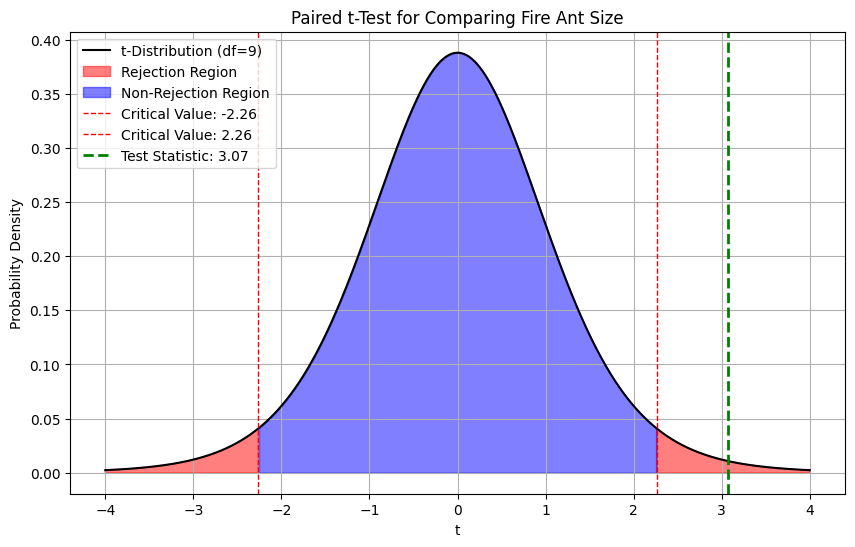

Test Statistic: 3.07
P-value: 0.0133
Critical Values: [np.float64(-2.2621571628540993), np.float64(2.2621571628540993)]
Reject the null hypothesis: There is enough evidence to prove that the 1st Gen and 11th Gen changes the length of the fire ants.


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given data for the two groups
fire_1 = np.array([4,3,4,6,4,2,2,5,4,6])
fire_11 = np.array([2,3,3,4,2,3,2,2,3,3])

# Calculate the differences
differences = fire_1 - fire_11

# Calculate the mean and standard deviation of the differences
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)

# Calculate the standard error of the mean difference
SE_diff = std_diff / np.sqrt(len(differences))

# Calculate the t-statistic
t_stat = mean_diff / SE_diff

# Degrees of freedom
df = len(differences) - 1

# Define the significance level and critical value
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df)
t_critical_values = [-t_critical, t_critical]

# Generate x values for the t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-Distribution (df={df})', color='black')

# Shade the rejection region in red
plt.fill_between(x, y, where=(x <= t_critical_values[0]) | (x >= t_critical_values[1]), color='red', alpha=0.5, label='Rejection Region')

# Shade the non-rejection region in blue
plt.fill_between(x, y, where=(x > t_critical_values[0]) & (x < t_critical_values[1]), color='blue', alpha=0.5, label='Non-Rejection Region')

# Draw lines for the critical t-values
for t_val in t_critical_values:
    plt.axvline(t_val, color='red', linestyle='--', linewidth=1, label=f'Critical Value: {t_val:.2f}')

# Draw line for the test statistic
plt.axvline(t_stat, color='green', linestyle='--', linewidth=2, label=f'Test Statistic: {t_stat:.2f}')

# Add labels and title
plt.title('Paired t-Test for Comparing Fire Ant Size')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.show()

# Print the test statistic and p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))  # two-tailed p-value
print(f"Test Statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Critical Values: {t_critical_values}")

# Print conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is enough evidence to prove that the 1st Gen and 11th Gen changes the length of the fire ants.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to prove that the 1st Gen and 11th Gen changes the length of the fire ants.")


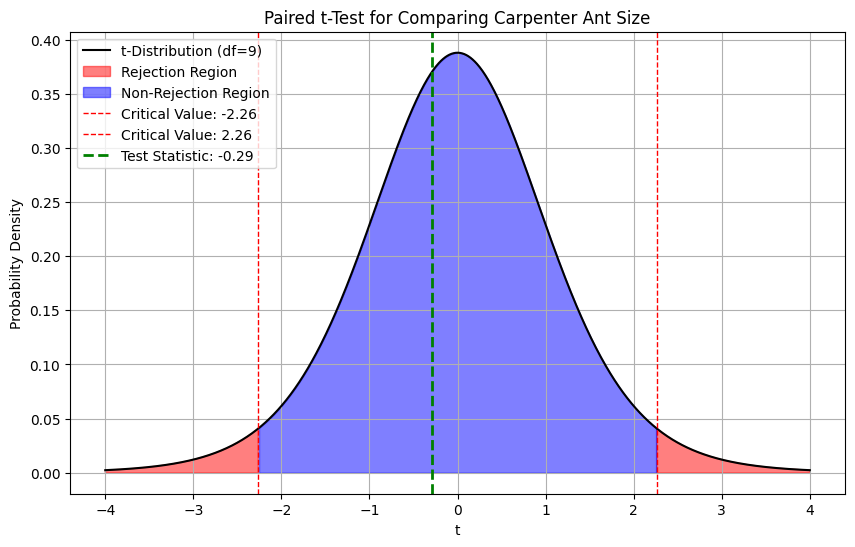

Test Statistic: -0.29
P-value: 0.7804
Critical Values: [np.float64(-2.2621571628540993), np.float64(2.2621571628540993)]
Fail to reject the null hypothesis: There is not enough evidence to prove that the 1st Gen and 300th Gen changes the length of the carpenter ants.


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given data for the two groups
carp_1 = np.array([1,2,2,4,2,3,2,2,3,3])
carp_300 = np.array([2,3,2,2,1,2,3,3,3,4])

# Calculate the differences
differences = carp_1 - carp_300

# Calculate the mean and standard deviation of the differences
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)

# Calculate the standard error of the mean difference
SE_diff = std_diff / np.sqrt(len(differences))

# Calculate the t-statistic
t_stat = mean_diff / SE_diff

# Degrees of freedom
df = len(differences) - 1

# Define the significance level and critical value
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df)
t_critical_values = [-t_critical, t_critical]

# Generate x values for the t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-Distribution (df={df})', color='black')

# Shade the rejection region in red
plt.fill_between(x, y, where=(x <= t_critical_values[0]) | (x >= t_critical_values[1]), color='red', alpha=0.5, label='Rejection Region')

# Shade the non-rejection region in blue
plt.fill_between(x, y, where=(x > t_critical_values[0]) & (x < t_critical_values[1]), color='blue', alpha=0.5, label='Non-Rejection Region')

# Draw lines for the critical t-values
for t_val in t_critical_values:
    plt.axvline(t_val, color='red', linestyle='--', linewidth=1, label=f'Critical Value: {t_val:.2f}')

# Draw line for the test statistic
plt.axvline(t_stat, color='green', linestyle='--', linewidth=2, label=f'Test Statistic: {t_stat:.2f}')

# Add labels and title
plt.title('Paired t-Test for Comparing Carpenter Ant Size')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.show()

# Print the test statistic and p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))  # two-tailed p-value
print(f"Test Statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Critical Values: {t_critical_values}")

# Print conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is enough evidence to prove that the 1st Gen and 300th Gen changes the length of the carpenter ants .")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to prove that the 1st Gen and 300th Gen changes the length of the carpenter ants.")